In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
img = mpimg.imread('dataset/dada/citra-dada-ayam/segar/segar_01.jpg')

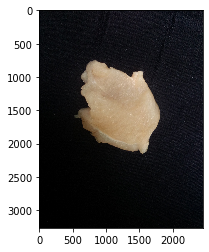

In [3]:
plt.imshow(img)

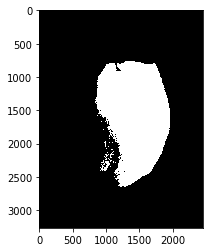

In [9]:
from PIL import Image 
image_file = Image.open("dataset/dada/citra-dada-ayam/segar/segar_03.jpg") # open color image
bin_image = image_file.convert('1', dither=Image.NONE) # convert image to black and white
plt.imshow(bin_image)
# image_file.save('/tmp/result.png')

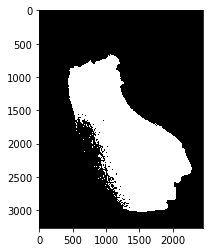

In [49]:
from PIL import Image

col = Image.open("dataset/dada/citra-dada-ayam/segar/segar_02.jpg")
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<128 else 255, '1')
plt.imshow(bw)

In [4]:
# Read a grayscale image
import cv2
im_gray = cv2.imread('dataset/dada/citra-dada-ayam/busuk/busuk_47.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to binary
(thresh, im_bw) = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# thresh = 127
# im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]

# #  Save to disk 
# cv2.imwrite('bw_image.png', im_bw)

print(im_gray)

[[27 30 39 ... 54 54 55]
 [18 22 40 ... 55 57 55]
 [11 21 29 ... 47 55 58]
 ...
 [ 1  1  1 ...  0  0  0]
 [ 3  0  0 ...  1  1  1]
 [ 5  1  1 ...  1  2  4]]


In [4]:
import os
import cv2

# Pendefinisian direktori data
rotten_data_dir = os.path.join('dataset/dada/citra-dada-ayam/busuk/')
fresh_data_dir = os.path.join('dataset/dada/citra-dada-ayam/segar/')

# List nama file citra daging ayam dengan label busuk
rotten_data_names = os.listdir('dataset/dada/citra-dada-ayam/busuk/') 
print(rotten_data_names[:10])

# List nama file citra daging ayam dengan label segar
fresh_data_names = os.listdir('dataset/dada/citra-dada-ayam/segar/')
print(fresh_data_names[:10])

['busuk_01.jpg', 'busuk_02.jpg', 'busuk_03.jpg', 'busuk_04.jpg', 'busuk_05.jpg', 'busuk_06.jpg', 'busuk_07.jpg', 'busuk_08.jpg', 'busuk_09.jpg', 'busuk_10.jpg']
['segar_01.jpg', 'segar_02.jpg', 'segar_03.jpg', 'segar_04.jpg', 'segar_05.jpg', 'segar_06.jpg', 'segar_07.jpg', 'segar_08.jpg', 'segar_09.jpg', 'segar_10.jpg']


In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameter untuk grafik; citra akan ditampilkan dalam 4x4
nrows = 4
ncols = 4

# Index untuk iterasi citra
pic_index = 0

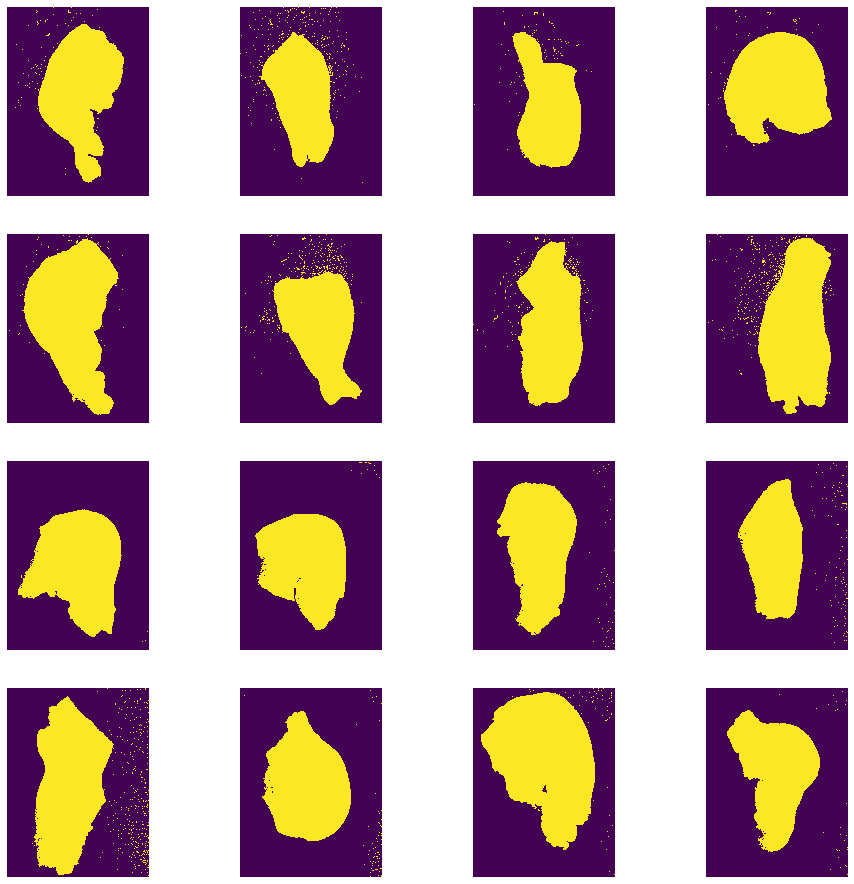

In [19]:
# Mengatur fig matplotlib dan mengatur ukuran agar sesuai dengan citra 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_rotten_pix = [os.path.join(rotten_data_dir, fname) 
                for fname in rotten_data_names[pic_index-8:pic_index]]
next_fresh_pix = [os.path.join(fresh_data_dir, fname) 
                for fname in fresh_data_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_rotten_pix+next_fresh_pix):
    # Set up subplot; indeks subplot mulai dari 1
    # Mengatur subplot; 
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    
    # baca citra dan konversi menjadi citra grayscale
    im_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # konversi citra grayscale menjadi citra biner dengan otsu thresholding
    (thresh, im_bw) = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    plt.imshow(im_bw)

plt.show()


In [5]:
from numpy import asarray
img_arr = asarray(im_bw)
print(len(img_arr))

NameError: name 'im_bw' is not defined

In [121]:
import math

In [129]:
pix = 100
top = []
left = []
right = []
bottom = []

start_row = 0
end_row = pix
row_iteration = math.floor(len(img_arr)/end_row)
num_file_name = 1
for i in range(0, row_iteration):
    row = img_arr[start_row:end_row]
    
    start_pix = 0
    end_pix = pix
    col_iteration = math.floor(len(row[0])/end_pix)
    for column in range(0, col_iteration):
        area = []
    
        for col in range(0, pix):
            area.append(row[col][start_pix:end_pix])

        count = 0
        for i in area:
            for j in i:
                if j == 255:
                    count += 1
        
        if count == pix**2:
            top.append(start_row)
            left.append(start_pix)
            bottom.append(end_row)
            right.append(end_pix)
           
            
        start_pix += pix
        end_pix += pix
    
    start_row += pix
    end_row += pix
    

for i in range(0, len(top)):
    im = image_file.crop((left[i], top[i], right[i], bottom[i]))
    im.save('dataset/dada/citra-dada-ayam/segar/segar_'+ str(i) +'.jpg')

In [86]:
top = [800,800,800,1000,1000,1200,1200,1400,1400,1600,1600,2000]
left = [1000,1200,1600,1200,1600,1400,1600,1200,1600,1400,1600,1400]
bottom = [1000,1000,1000,1200,1200,1400,1400,1600,1600,1800,1800,2200]
right = [1200,1400,1800,1400,1800,1600,1800,1400,1800,1600,1800,1600]

for i in range(0, 12):
    im = image_file.crop((left[i], top[i], right[i], bottom[i]))
    im.save('dataset/dada/citra-dada-ayam/segar/segar_'+ str(i) +'.jpg')

In [92]:
import os
os.makedirs('dataset/dada/citra-dada-ayam/segar/hello')

In [18]:
import os
path = 'dataset/dada/citra-dada-ayam/busuk/'
for filename in os.listdir(path):
    prefix, num = filename[:-4].split('_')
    num = num.zfill(2)
    new_filename = prefix + "_" + num + ".jpg"
    os.rename(os.path.join(path, filename), os.path.join(path, new_filename))

In [16]:
import os
path = 'dataset/dada/citra-dada-ayam/busuk/'
for filename in os.listdir(path):
    prefix, num = filename[:-4].split(' (')
    num = num.replace(')', '')
    new_filename = prefix + "_" + num + ".jpg"
    os.rename(os.path.join(path, filename), os.path.join(path, new_filename))

# Final Code v0.01

In [6]:
# import library
import os
from PIL import Image 
from numpy import asarray
import math

In [7]:
dataset_dir = "dataset/dada/citra-dada-ayam/segar/"
dataset = os.listdir(dataset_dir)

In [8]:
def crop(img_list, pix, tolerance=0.99):
    for num_folder in range(1,len(img_list)+1):
        os.makedirs('dataset/dada/citra-dada-ayam/segar/sampel'+str(num_folder))
        
        image_file = Image.open('dataset/dada/citra-dada-ayam/segar/'+img_list[num_folder-1]) # open color image
        bin_image = image_file.convert('1', dither=Image.NONE) # convert image to black and white
        img_arr = asarray(bin_image) # convert bin image to numpy array
        
        top = []
        left = []
        right = []
        bottom = []

        start_row = 0
        end_row = pix
        row_iteration = math.floor(len(img_arr)/end_row)
        num_file_name = 1
        for i in range(0, row_iteration):
            row = img_arr[start_row:end_row]

            start_pix = 0
            end_pix = pix
            col_iteration = math.floor(len(row[0])/end_pix)
            for column in range(0, col_iteration):
                area = []

                for col in range(0, pix):
                    area.append(row[col][start_pix:end_pix])

                count = 0
                for i in area:
                    for j in i:
                        if j:
                            count += 1

                white_value = tolerance * pix**2
                if count >= white_value:
                    top.append(start_row)
                    left.append(start_pix)
                    bottom.append(end_row)
                    right.append(end_pix)

                start_pix += pix
                end_pix += pix

            start_row += pix
            end_row += pix


        for i in range(0, len(top)):
            num_file = i+1
            im = image_file.crop((left[i], top[i], right[i], bottom[i]))
            im.save('dataset/dada/citra-dada-ayam/segar/sampel'+ str(num_folder) +'/segar_'+ str(num_file) +'.jpg')

In [9]:
crop(dataset, 100)

# Final Code v0.02 with automate thresholding

In [1]:
import os
import cv2
from numpy import asarray
import math
from PIL import Image 

In [2]:
dataset_dir = "dataset/dada/citra-dada-ayam/segar/"
dataset = os.listdir(dataset_dir)

In [5]:
dataset_dir = "dataset/dada/citra-dada-ayam/busuk/"
dataset = os.listdir(dataset_dir)

In [3]:
def crop(img_list, pix, path):
    for num_folder in range(1,len(img_list)+1):
        os.makedirs(path+'sampel'+str(num_folder))
        
        image_file = Image.open(path+img_list[num_folder-1]) # open color image
        
        # read the image stored in BGR order and convert to grayscale
        im_gray = cv2.imread(path+img_list[num_folder-1], cv2.IMREAD_GRAYSCALE)
        # Convert grayscale image to binary
        (thresh, im_bw) = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        
        img_arr = asarray(im_bw) # convert bin image to numpy array
        
        top = []
        left = []
        right = []
        bottom = []

        start_row = 0
        end_row = pix
        row_iteration = math.floor(len(img_arr)/end_row)
        num_file_name = 1
        for i in range(0, row_iteration):
            row = img_arr[start_row:end_row]

            start_pix = 0
            end_pix = pix
            col_iteration = math.floor(len(row[0])/end_pix)
            for column in range(0, col_iteration):
                area = []

                for col in range(0, pix):
                    area.append(row[col][start_pix:end_pix])

                count = 0
                for i in area:
                    for j in i:
                        if j == 255:
                            count += 1

                if count == pix**2:
                    top.append(start_row)
                    left.append(start_pix)
                    bottom.append(end_row)
                    right.append(end_pix)


                start_pix += pix
                end_pix += pix

            start_row += pix
            end_row += pix


        for i in range(0, len(top)):
            num_file = i+1
            im = image_file.crop((left[i], top[i], right[i], bottom[i]))
            im.save(path+'sampel'+ str(num_folder) +'/busuk_'+ str(num_file) +'.jpg')

In [6]:
path = 'dataset/dada/citra-dada-ayam/busuk/'
crop(dataset, 100, path)

# Mengurutkan dataset

In [8]:
# rename folder
import os
path = 'dataset/dada/citra-dada-ayam/dataset 100x100 finale/busuk'
for foldername in os.listdir(path):
    prefix, num = foldername[:6],foldername[6:] 
    num = num.zfill(2)
    new_foldername = prefix + '_' +num
    os.rename(os.path.join(path, foldername), os.path.join(path, new_foldername))

In [11]:
# rename file
import os

main_dir = 'dataset/dada/citra-dada-ayam/dataset 100x100 finale/busuk/'

for path in os.listdir(main_dir):
    path = main_dir + path
    for filename in os.listdir(path):
        prefix, num = filename[:-4].split('_')
        num = num.zfill(2)
        new_filename = prefix + "_" + num + ".jpg"
        os.rename(os.path.join(path, filename), os.path.join(path, new_filename))

In [12]:
import os
import shutil

# direktori utama
path = 'dataset/dada/citra-dada-ayam/dataset 100x100 finale/busuk/'

# untuk setiap gambar dalam folder sampel pindahkah ke folder dataset dan ubah nama file
file_count = 1
for foldername in os.listdir(path):
    for filename in os.listdir(path+foldername):
        shutil.move(path+foldername + '/' + filename, path+filename)
        num = str(file_count)
        num = num.zfill(4)
        new_filename = 'segar_' + num + '.jpg'
        os.rename(os.path.join(path, filename), os.path.join(path, new_filename))
        file_count += 1

In [13]:
import random
import shutil

def dataset_split(path, new_path, num_to_select): 
    group_of_items = os.listdir(path)
    list_of_random_items = random.sample(group_of_items, num_to_select)    

    for item in list_of_random_items:
        shutil.move(path+item, new_path+item)

In [24]:
path = 'dataset/dada/citra-dada-ayam/dataset_citra_dada_ayam/dataset 100x100/busuk/'
new_path = 'dataset/dada/citra-dada-ayam/dataset_citra_dada_ayam/dataset 100x100/validation/busuk/'
num_to_select = 832

dataset_split(path, new_path, num_to_select)

In [32]:
# rename file
import os

main_dir = 'dataset/dada/citra-dada-ayam/dataset_citra_dada_ayam/dataset 100x100/validation/busuk/'

for filename in os.listdir(main_dir):
    prefix, num = filename[:-4].split('_')
    new_filename = "busuk" + "_" + num + ".jpg"
    os.rename(os.path.join(main_dir, filename), os.path.join(main_dir, new_filename))

# Misc

In [95]:
import cv2
img = cv2.imread('dataset/dada/citra-dada-ayam/segar/segar_01.jpg')
crop_img = img[0:200, 0:200]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)

-1

In [40]:
img = [[1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
       [1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
       [1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
       [1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
       [1,1,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
       [1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0]]

start_row = 0
end_row = 3
row_iteration = math.floor(len(img)/end_row)
for i in range(0, row_iteration):
    row = img[start_row:end_row]
    
    start_pix = 0
    end_pix = 5
    col_iteration = math.floor(len(row[0])/end_pix)
    for column in range(0, col_iteration):
        area = []
    
        for col in range(0, 3):
            area.append(row[col][start_pix:end_pix])

        count = 0
        for i in area:
            for j in i:
                if j == 1:
                    count += 1

        if count == 15:
            print('ok')
            
        start_pix += 5
        end_pix += 5
    
    start_row += 3
    end_row += 3
        
    
print(area)

ok
ok
ok
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
